<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1">Project description</a></span></li><li><span><a href="#Getting-to-know-data" data-toc-modified-id="Getting-to-know-data-2">Getting to know data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.0.0.1">Missing values</a></span></li><li><span><a href="#Duplicates-detection" data-toc-modified-id="Duplicates-detection-2.0.0.2">Duplicates detection</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-3">Linear Regression Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Scaling-data" data-toc-modified-id="Scaling-data-3.0.1">Scaling data</a></span></li><li><span><a href="#Making-train-and-test-dataset-splits" data-toc-modified-id="Making-train-and-test-dataset-splits-3.0.2">Making train and test dataset splits</a></span></li><li><span><a href="#Making-predictions" data-toc-modified-id="Making-predictions-3.0.3">Making predictions</a></span></li></ul></li></ul></li><li><span><a href="#Profit-calculation" data-toc-modified-id="Profit-calculation-4">Profit calculation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

# Project description

OilyGiant mining company has a budget of 100 USD million to develop 200 new wells. There are three datasets reserves levels and some oil quality parameters.<br>

<b>The task</b> is to pick the best region out of three for well development.<br>
We need to build a model that will help to pick the region with the highest profit margin. We need to analyze potential profit and risks using the Bootstrap technique.<br>

<b>Conditions:</b><br>
Only linear regression is suitable for model training (the rest are not sufficiently predictable).<br>
When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.<br>

<b>Data description</b>
We are given geological exploration data for the three regions. Each region's data has the following info:<br>

<b>Features:</b><br>
<i>id</i> — unique oil well identifier<br>
<i>f0, f1, f2</i> — three features of points (oil quality)<br>
<i>product</i> — volume of reserves in the oil well (thousand barrels)<br>

<b>Conditions:</b><br>
- Only linear regression is suitable for model training (the rest are not sufficiently predictable).<br>
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.<br>
- The budget for oil well development is 100 USD million.<br>

# Getting to know data

In [1]:
import sys
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
geo0 = pd.read_csv('geo_data_0.csv')
geo1 = pd.read_csv('geo_data_1.csv')
geo2 = pd.read_csv('geo_data_2.csv')

In [3]:
geo0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo0.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


#### Missing values

In [5]:
geo0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

#### Duplicates detection

In [6]:
geo2.duplicated().sum()

0

<b>Conclusion</b>:<br>
- There are neither missing values nor duplicates in the three datasets. <br>
- 'id' column will have to be removed from prior to running linear regression<br>

# Linear Regression Model

### Scaling data

In [7]:
def scaler(df):
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(df[numeric])
    df[numeric] = scaler.transform(df[numeric])
    return df

In [8]:
geo0 = scaler(geo0)
geo1 = scaler(geo1)
geo2 = scaler(geo2)

### Making train and test dataset splits

Let's split data into train and test sets 75 to 25% respectively.

In [9]:
# dataset 1
X0 = geo0.drop(['product', 'id'], axis=1)
y0 = geo0['product']            
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y0, test_size=0.25, random_state=42)
# dataset 2
X1 = geo1.drop(['product', 'id'], axis=1)
y1 = geo1['product']            
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.25, random_state=42)
# dataset 2
X2 = geo2.drop(['product', 'id'], axis=1)
y2 = geo2['product']            
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.25, random_state=42)

### Making predictions

In [10]:
def get_score(X_train, y_train, X_test, y_test):
    reg = LinearRegression().fit(X_train, y_train)
    print(f'RMSE train set: {np.sqrt(metrics.mean_squared_error(y_train, reg.predict(X_train))):.2f}')
    print(f'RMSE test set: {np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))):.2f}')
    print(f'Average volume of predicted reserves: {reg.predict(X_test).mean():.2f}')
    print(f'Average volume of actual reserves: {y_test.mean():.2f}')

In [11]:
get_score(X0_train, y0_train, X0_test, y0_test)

RMSE train set: 37.67
RMSE test set: 37.76
Average volume of predicted reserves: 92.40
Average volume of actual reserves: 92.33


In [12]:
get_score(X1_train, y1_train, X1_test, y1_test)

RMSE train set: 0.89
RMSE test set: 0.89
Average volume of predicted reserves: 68.71
Average volume of actual reserves: 68.73


In [13]:
get_score(X2_train, y2_train, X2_test, y2_test)

RMSE train set: 40.03
RMSE test set: 40.15
Average volume of predicted reserves: 94.77
Average volume of actual reserves: 95.15


<b>Conclusion</b>: The RMSE values for train and test datasets for regions #1 and #3 are relatively the same (37 and 40) and the average predicted values and average mean values are on the same order (92/92 and 94/95). The can conclude that data of these regions is more similar to one another, than to the second region. The linear model doesn't fit data for these two regions quite well, because the error (RMSE) is quite large. For the region #2 the RMSE is the least of all three regions (0.89), which suggests that the model better fits the data of this region. At the same time the average actual and predicted reserves are lower (68/68) than for the other two regions.

Now we are going to save predictions, e.g. we will create new data frames with actual and predicted reserves for all three regions, using the test sets.

In [14]:
def get_predictions(X_train, y_train, X_test, y_test):
    reg = LinearRegression().fit(X_train, y_train)
    df = pd.DataFrame()
    df['actual'] = y_test
    df['predicted'] = reg.predict(X_test)
    return df

In [15]:
df0 = get_predictions(X0_train, y0_train, X0_test, y0_test)

In [16]:
df1 = get_predictions(X1_train, y1_train, X1_test, y1_test)

In [17]:
df2 = get_predictions(X2_train, y2_train, X2_test, y2_test)

# Profit calculation

The budget for oil development is 100 USD million. Revenue from one unit of product is 4,500 dollars. As per the condition we need to study 500 point and pick 200 best points for the profit calculation. Let us calculate break even point, e.g. minimum production level from one well to cover its development cost.

In [18]:
TOTAL_BUDGET = (100*10**6)
budget_per_well = TOTAL_BUDGET/200
production_per_well = budget_per_well/4500
round(production_per_well, 2)

111.11

As such we need at least 111.11 units of product from one oil well. The average reserves levels for the three regions are much less than this number.

In [19]:
def get_profit(df):
    '''fuction creates samples of 500 wells 1000 times, takes the best 200 of them
    and calculates profit for these 200 best;
    it saves the profit to a list, from which the mean profit for this region can be
    calculated along with the confidence interval
    '''
    profit = []
    for i in range(1000):
        sample_rev = df.sample(500).sort_values(
            'predicted', ascending=False).iloc[0:200, ].actual.sum()*4500
        profit.append(sample_rev - TOTAL_BUDGET)
    plt.hist(profit)
    plt.title('Bootstrapped Histogram of Total Profit')
    confidence_interval = [round(np.percentile(profit, 2.5)), round(np.percentile(profit, 97.5))]
    risk_of_losses = st.percentileofscore(profit, 0)

    print(f'Mean value for the profit in the region: {round(np.mean(profit))}')
    print(f'95% Confidence interval: {confidence_interval}')
    print(f'Risk of losses: {risk_of_losses}%')

Mean value for the profit in the region: 4122844
95% Confidence interval: [-921899, 9421614]
Risk of losses: 5.4%


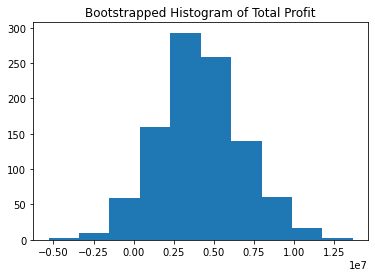

In [20]:
get_profit(df0)

For the region #1 from the histogram we can see everything above zero is profitable and everything below zero is not profitable.

Mean value for the profit in the region: 4389552
95% Confidence interval: [389893, 8379664]
Risk of losses: 1.7%


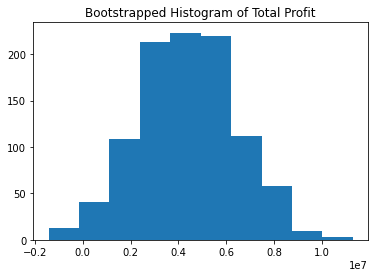

In [21]:
get_profit(df1)

Mean value for the profit in the region: 3775695
95% Confidence interval: [-1391182, 8732750]
Risk of losses: 7.3%


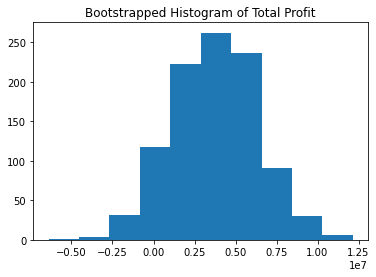

In [22]:
get_profit(df2)

The other two regions have negative confidence intervals and 100% risk of losses.

# Conclusion

Our calculations showed that the best region to drill new 200 wells is region #2. because it has the best confidence interval and lowest risks of losses.<br/>